In [366]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/air-passengers/AirPassengers.csv
/kaggle/input/bur-qf-m4c-tra/Bur_QF_M4C_Tra.csv


In [367]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# **Importing Data**

In [368]:
path = "/kaggle/input/air-passengers/AirPassengers.csv"
data = pd.read_csv(path)
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


# Naming Data

In [369]:
data.columns = ['Month','Number of Passengers']
data.head()

,Month,Number of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


# Visualizing Data

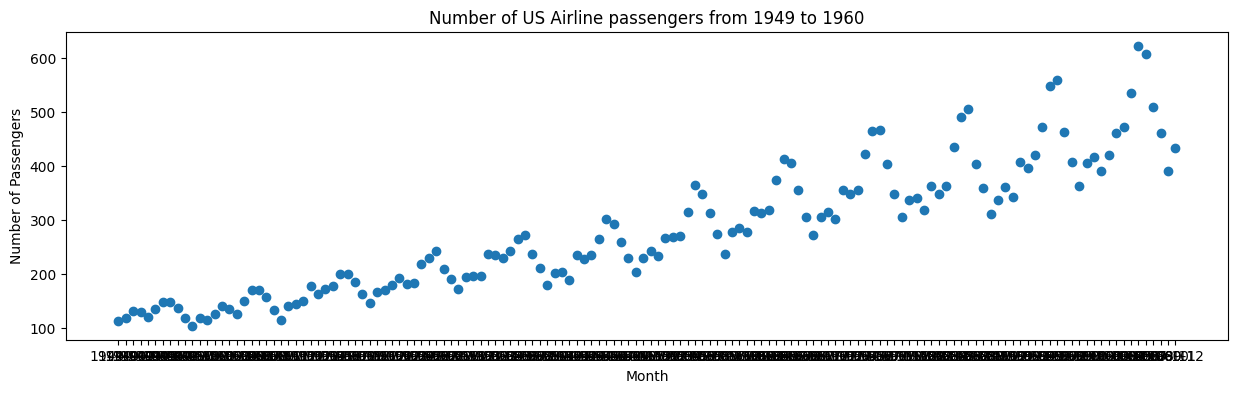

In [370]:
def plot_data(data, x, y, title="", xlabel='Month', ylabel='Number of Passengers', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.scatter(x, y, color='tab:blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_data(data, x=data['Month'], y=data['Number of Passengers'], title='Number of US Airline passengers from 1949 to 1960')

# Splitting Data

In [371]:
data['Month'] = data.index

In [372]:
X = data[['Month']]
y = data['Number of Passengers']

In [373]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# Linear Regression

In [374]:
model = LinearRegression()
# Training the model on the training data available
model.fit(X_train, y_train)

LinearRegression()

In [375]:
y_pred = model.predict(X_test)

In [376]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'r2_score: {r2}')

Mean Squared Error: 1583.2582178674666
Mean Absolute Error: 31.70074657109523
r2_score: 0.8528909868311487


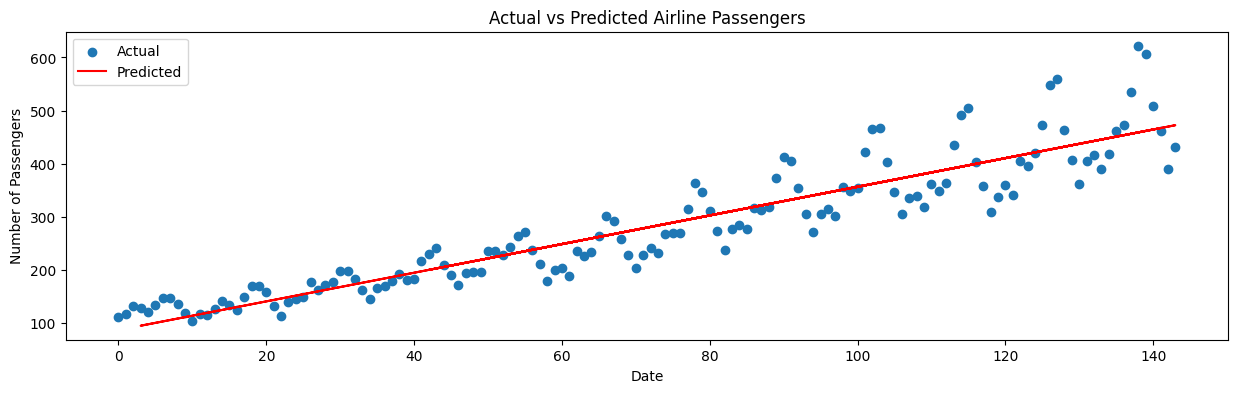

In [377]:
# Plotting the actual vs predicted values inorder to visualize model performance
plt.figure(figsize=(15, 4))
plt.scatter(data.index, data['Number of Passengers'], label='Actual')
plt.plot(X_test.index, y_pred, label='Predicted', color='red')
plt.title('Actual vs Predicted Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

# Decision Tree Regressor

In [378]:
model = DecisionTreeRegressor(max_depth=5, random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [379]:
y_pred1 = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred1)
mse = mean_squared_error(y_test, y_pred1)
r2 = r2_score(y_test, y_pred1)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("r2:", r2)

Mean Absolute Error (MAE): 33.33050397877984
Mean Squared Error (MSE): 1982.1802737536555
r2: 0.8158249989143128


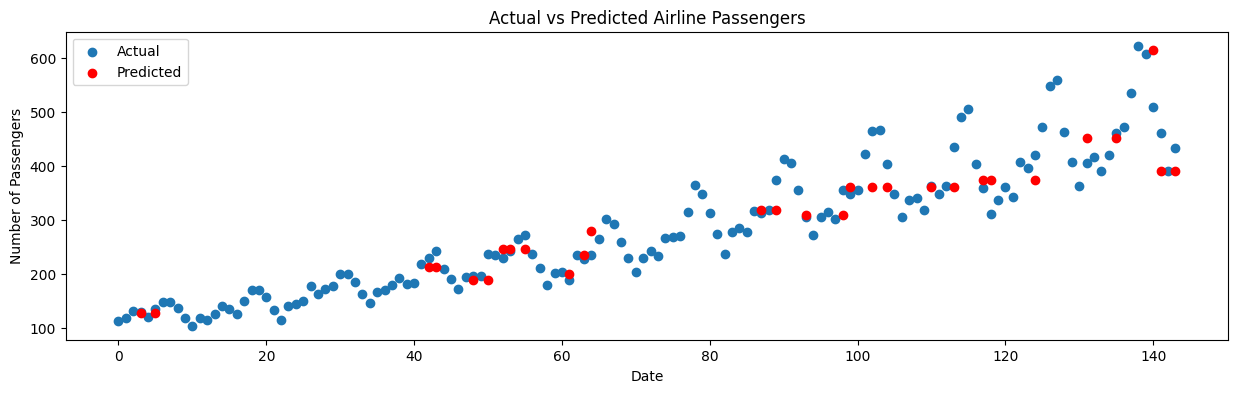

In [380]:
# Plotting the actual vs predicted values inorder to visualize model performance
plt.figure(figsize=(15, 4))
plt.scatter(data.index, data['Number of Passengers'], label='Actual')
plt.scatter(X_test.index, y_pred1, label='Predicted', color='red')
plt.title('Actual vs Predicted Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

# K Neigbour Regression

In [381]:
from sklearn.neighbors import KNeighborsRegressor

In [382]:
model = KNeighborsRegressor()
# Training the model on the training data available
model.fit(X_train, y_train)


KNeighborsRegressor()

In [383]:
y_pred2 = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred2)
mse = mean_squared_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("r2:", r2)

Mean Absolute Error (MAE): 31.655172413793103
Mean Squared Error (MSE): 1670.9434482758622
r2: 0.8447436817552674


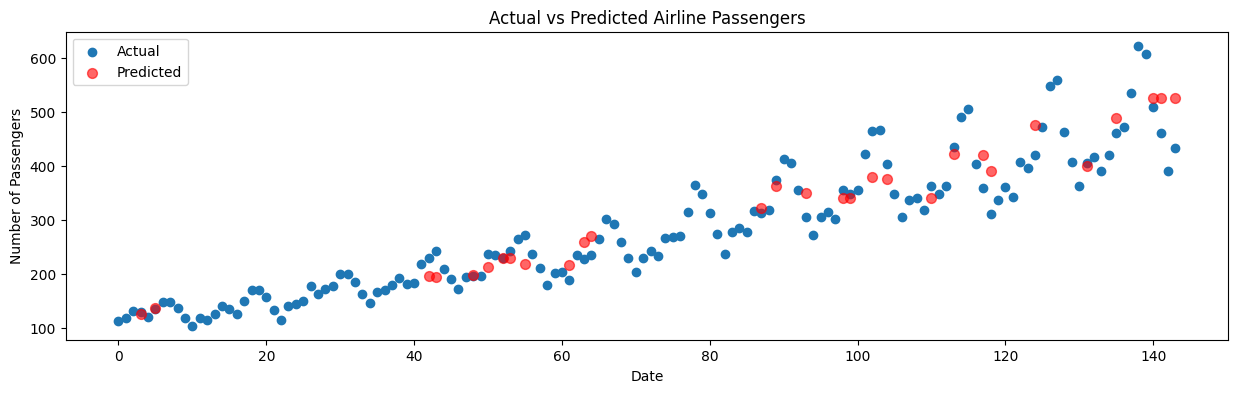

In [384]:
# Plotting the actual vs predicted values inorder to visualize model performance
plt.figure(figsize=(15, 4))
plt.scatter(data.index, data['Number of Passengers'], label='Actual')
plt.scatter(X_test.index, y_pred2, label='Predicted', color='red',s=50, alpha = 0.6)
plt.title('Actual vs Predicted Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

# RandomForestRegressor

In [385]:
 from sklearn.ensemble import RandomForestRegressor

In [386]:
model = RandomForestRegressor(max_depth=5, random_state=42)

In [387]:
model.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, random_state=42)

In [388]:
y_pred3 = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred3)
mse = mean_squared_error(y_test, y_pred3)
r2 = r2_score(y_test, y_pred3)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("r2:", r2)

Mean Absolute Error (MAE): 24.90342663011164
Mean Squared Error (MSE): 1035.635903845452
r2: 0.9037735133172767


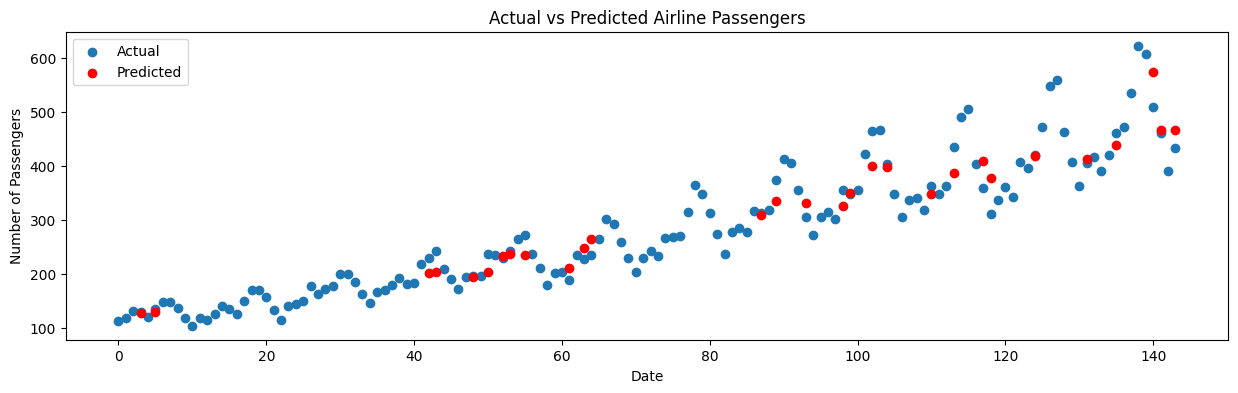

In [389]:
# Plotting the actual vs predicted values inorder to visualize model performance
plt.figure(figsize=(15, 4))
plt.scatter(data.index, data['Number of Passengers'], label='Actual')
plt.scatter(X_test.index, y_pred3, label='Predicted', color='red')
plt.title('Actual vs Predicted Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()